In [41]:
#Importing all the needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#loading the data

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Deep Learning/Social_Network_Ads.csv')

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
#Info function will provide the non null records and datatypes of the data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [42]:
#drop the User ID column as it is of no use

In [5]:
df.drop('User ID',axis=1,inplace=True)

In [6]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [ ]:
#Target variables counts

In [7]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

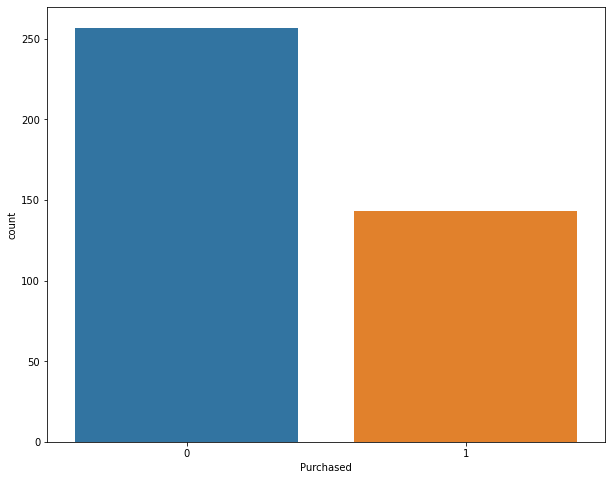

In [8]:
plt.figure(figsize=(10,8))
sns.countplot(df['Purchased'])
plt.show()

In [8]:
#Gender value count from data

In [9]:
df['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

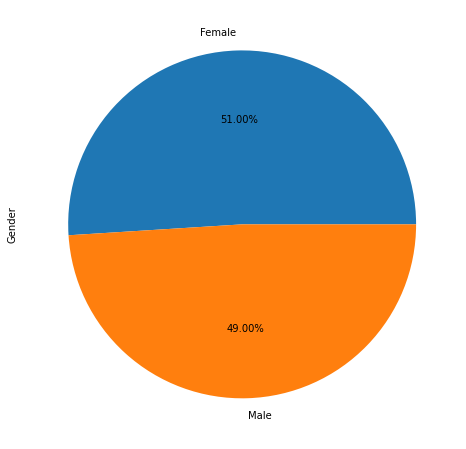

In [10]:
plt.figure(figsize=(10,8))
df['Gender'].value_counts().plot.pie(autopct='%.2f%%')
plt.show()

In [ ]:
#Age distribution of data

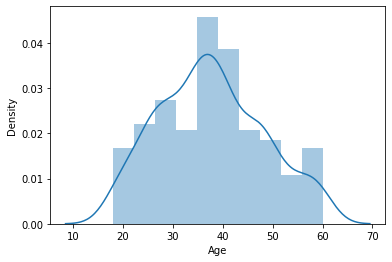

In [11]:
sns.distplot(df['Age'])
plt.show()

In [43]:
#Outlier detection from numerical columns

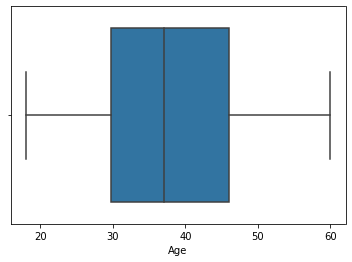

In [12]:
sns.boxplot(df['Age'])
plt.show()

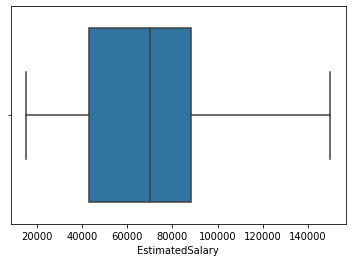

In [13]:
sns.boxplot(df['EstimatedSalary'])
plt.show()

In [14]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [44]:
#Converting categorical data to numerical

In [15]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})

In [16]:
df.shape

(400, 4)

In [ ]:
#Data distribution of features with respect to target

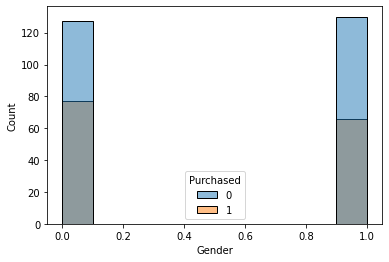

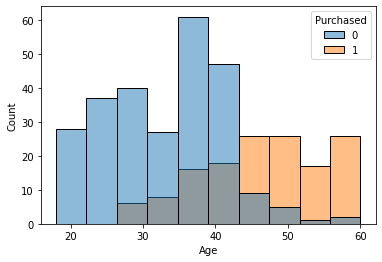

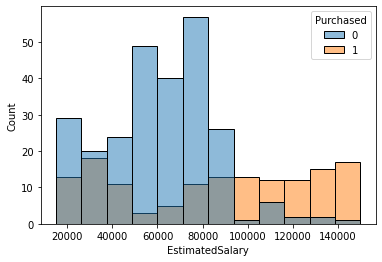

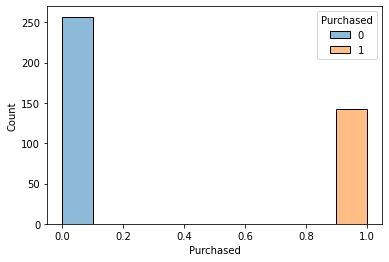

In [17]:
for i in df.columns:
  sns.histplot(data=df,x=df[i],hue=df['Purchased'])
  plt.show()

In [16]:
#Splitting the data in X and y

In [18]:
X=df.iloc[:,:-1].values
X

array([[    1,    19, 19000],
       [    1,    35, 20000],
       [    0,    26, 43000],
       ...,
       [    0,    50, 20000],
       [    1,    36, 33000],
       [    0,    49, 36000]])

In [19]:
y=df.iloc[:,-1].values
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [19]:
#Performing train test split on data 

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)

In [ ]:
#scaling the data

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
sc=StandardScaler()

In [24]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [45]:
#importing neural network libraries

In [25]:
from tensorflow.keras import Sequential

In [26]:
from tensorflow.keras.layers import Dense

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

In [ ]:
#initializing the model

In [28]:
ann=Sequential()

In [ ]:
#Adding layers to the model

In [29]:
ann.add(Dense(units=15,activation='relu'))

In [30]:
ann.add(Dense(units=15,activation='relu'))

In [46]:
#Output layer

In [31]:
ann.add(Dense(units=1,activation='sigmoid'))

In [ ]:
#specify the loss function, optimizer, and metrics using compile.

In [32]:
ann.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#fitting the model

In [33]:
ann.fit(X_train,y_train,epochs=500,validation_data=(X_test, y_test),verbose=2,batch_size=70,callbacks=[early_stop])


Epoch 1/500
5/5 - 1s - loss: 0.6922 - accuracy: 0.6667 - val_loss: 0.6837 - val_accuracy: 0.6800 - 1s/epoch - 285ms/step
Epoch 2/500
5/5 - 0s - loss: 0.6883 - accuracy: 0.6767 - val_loss: 0.6797 - val_accuracy: 0.6800 - 48ms/epoch - 10ms/step
Epoch 3/500
5/5 - 0s - loss: 0.6845 - accuracy: 0.6733 - val_loss: 0.6756 - val_accuracy: 0.6900 - 65ms/epoch - 13ms/step
Epoch 4/500
5/5 - 0s - loss: 0.6805 - accuracy: 0.6667 - val_loss: 0.6720 - val_accuracy: 0.7000 - 51ms/epoch - 10ms/step
Epoch 5/500
5/5 - 0s - loss: 0.6767 - accuracy: 0.6667 - val_loss: 0.6678 - val_accuracy: 0.7000 - 50ms/epoch - 10ms/step
Epoch 6/500
5/5 - 0s - loss: 0.6726 - accuracy: 0.6733 - val_loss: 0.6639 - val_accuracy: 0.7000 - 64ms/epoch - 13ms/step
Epoch 7/500
5/5 - 0s - loss: 0.6686 - accuracy: 0.6733 - val_loss: 0.6599 - val_accuracy: 0.7000 - 49ms/epoch - 10ms/step
Epoch 8/500
5/5 - 0s - loss: 0.6647 - accuracy: 0.6633 - val_loss: 0.6563 - val_accuracy: 0.6900 - 46ms/epoch - 9ms/step
Epoch 9/500
5/5 - 0s - los

In [ ]:
#making a data frame of models loss history

In [34]:
loss_df=pd.DataFrame(ann.history.history)

In [35]:
loss_df

,loss,accuracy,val_loss,val_accuracy
0,0.692166,0.666667,0.683669,0.68
1,0.688346,0.676667,0.679690,0.68
2,0.684479,0.673333,0.675649,0.69
3,0.680473,0.666667,0.671970,0.70
4,0.676745,0.666667,0.667803,0.70
...,...,...,...,...
376,0.232358,0.910000,0.235119,0.90
377,0.232250,0.910000,0.235256,0.90
378,0.232100,0.910000,0.235212,0.90
379,0.232123,0.910000,0.235394,0.90


In [35]:
#Plotting the loss of model

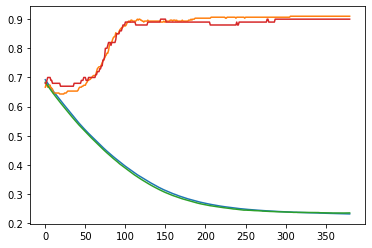

In [36]:
plt.plot(loss_df)
plt.show()

In [37]:
y_train_pred=ann.predict(X_train)
y_test_pred=ann.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [38]:
y_train_pred=np.where(y_train_pred>0.5,1,0)
y_test_pred=np.where(y_test_pred>0.5,1,0)

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y_train_pred,y_train))
print(classification_report(y_test_pred,y_test))


              precision    recall  f1-score   support

           0       0.92      0.94      0.93       187
           1       0.90      0.86      0.88       113

    accuracy                           0.91       300
   macro avg       0.91      0.90      0.90       300
weighted avg       0.91      0.91      0.91       300

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        59
           1       0.94      0.80      0.87        41

    accuracy                           0.90       100
   macro avg       0.91      0.89      0.89       100
weighted avg       0.90      0.90      0.90       100

